# Hypothesis 3 Visualizations
## Is there a correlation between model years and annual car registrations, and what are the comparisons between BEVs and PHEVs?

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the CSV file
df = pd.read_csv("../data/clean_data/full_vehicle_data.csv")
print(df.info())
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181055 entries, 0 to 181054
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN (1-10)             181055 non-null  object 
 1   County                 181055 non-null  object 
 2   City                   181055 non-null  object 
 3   State                  181055 non-null  object 
 4   Postal Code            181055 non-null  int64  
 5   Model Year             181055 non-null  int64  
 6   Make                   181055 non-null  object 
 7   Model                  181055 non-null  object 
 8   Electric Vehicle Type  181055 non-null  object 
 9   Electric Range         181055 non-null  int64  
 10  Latitude               181055 non-null  float64
 11  Longitude              181055 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 16.6+ MB
None


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Latitude,Longitude
0,1GCDE14HXV,Snohomish,Marysville,WA,98270,1997,CHEVROLET,S-10 PICKUP,Battery Electric Vehicle (BEV),39,48.05542,-122.17673


## Color Palette

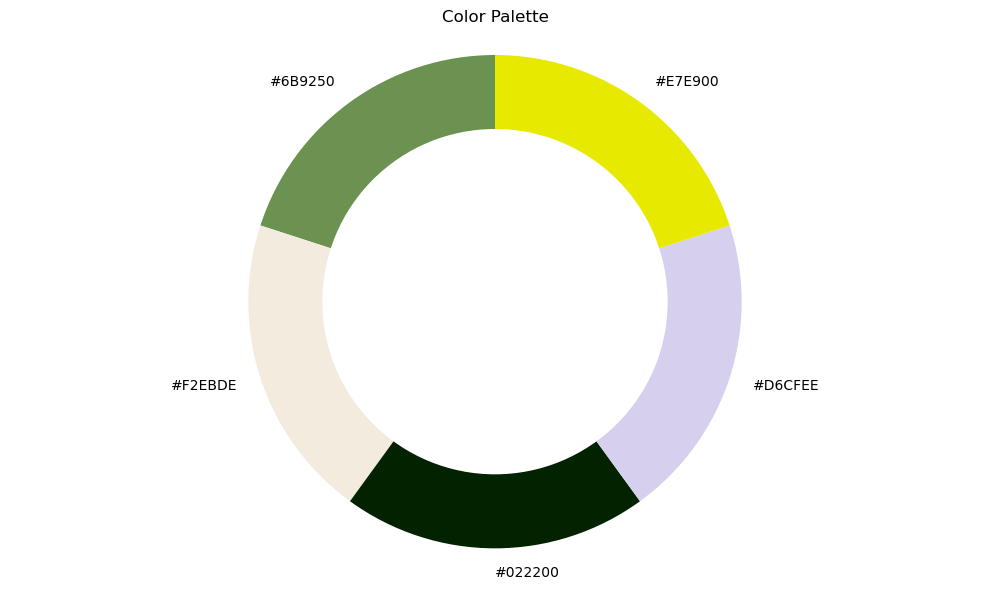

In [3]:
color_df = [10, 10, 10, 10, 10]
labels = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(color_df, labels=labels, startangle=90, colors=['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a white circle to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Color Palette')

# Save/Show plot
plt.tight_layout()
# plt.savefig("images/Color Palette.png")
plt.show()

## Bar Chart - Hybrid vs Battery Electric Registrations

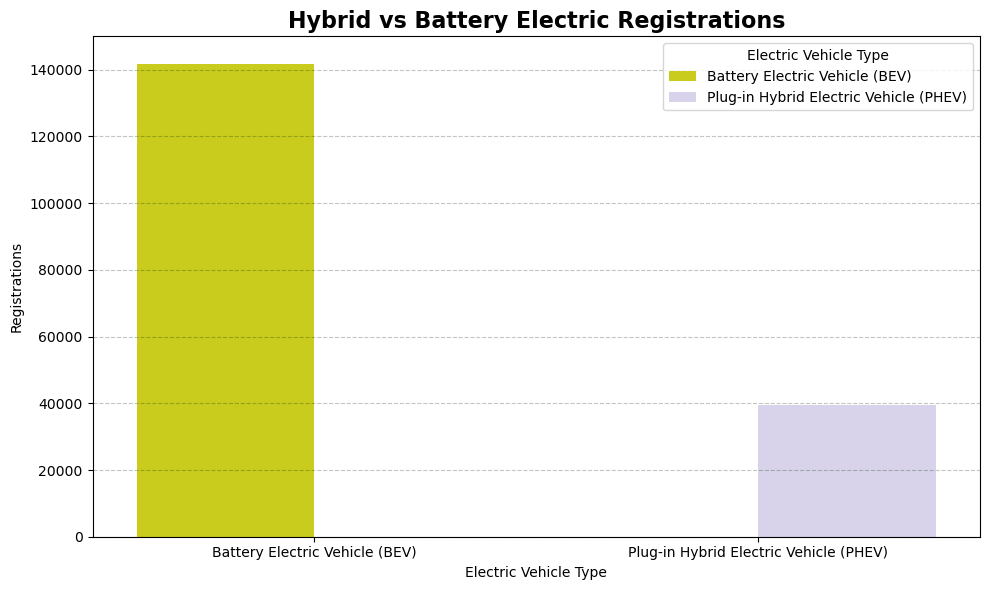

In [4]:
# Step 1: Get the data
# Create the plot
plt.figure(figsize=(10,6))
sns.countplot(x='Electric Vehicle Type', hue='Electric Vehicle Type', data=df, palette=['#E7E900' ,'#D6CFEE'])

# Customizations
plt.title("Hybrid vs Battery Electric Registrations", fontsize=16, fontweight="bold")
plt.ylim(0, 150000)
plt.ylabel('Registrations')

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.25)


# Save/Show plot
plt.tight_layout()
plt.savefig("images/Bar_Chart-Hybrid_vs_Battery_Electric_Registrations.png")
plt.show()

## Bar Chart - Registrations of Model Years for Battery Electrics vs Hybrids

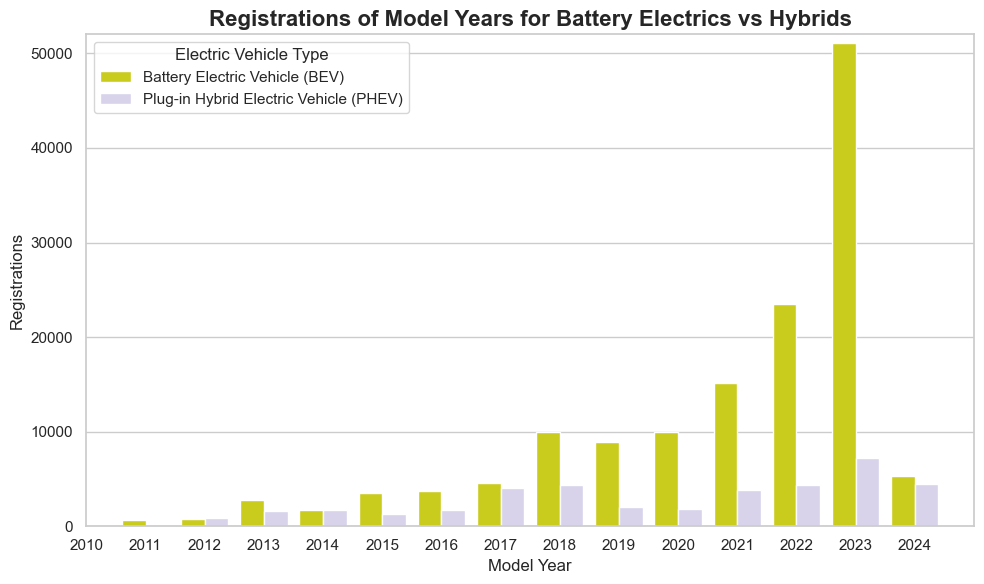

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Model Year', hue='Electric Vehicle Type', data=df, palette=['#E7E900' ,'#D6CFEE'])

plt.title('Registrations of Model Years for Battery Electrics vs Hybrids', fontsize=16, fontweight="bold")
plt.xlabel('Model Year')
plt.ylabel('Registrations')
plt.ylim(0, 52000)
plt.xlim(7, 22)

# Save/Show plot
plt.tight_layout()
plt.savefig("images/Bar_Chart-Registrations_of_Model_Years_for_Battery_Electrics_vs_Hybrids.png")
plt.show()

In [6]:
mask = df["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)"

# Now we can create the new dataframe out of the mask with the rest_index function
bev_df = df.loc[mask].reset_index(drop=True)
bev_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Latitude,Longitude
0,1GCDE14HXV,Snohomish,Marysville,WA,98270,1997,CHEVROLET,S-10 PICKUP,Battery Electric Vehicle (BEV),39,48.055420,-122.176730
1,1FTZR1078W,Clallam,Sequim,WA,98382,1998,FORD,RANGER,Battery Electric Vehicle (BEV),58,48.081250,-123.105015
2,1FTZR0812X,Skagit,Mount Vernon,WA,98274,1999,FORD,RANGER,Battery Electric Vehicle (BEV),74,48.412875,-122.288178
3,1FTZR0812X,Pierce,Graham,WA,98338,1999,FORD,RANGER,Battery Electric Vehicle (BEV),74,47.076396,-122.295340
4,1FTZR0813X,Pierce,Graham,WA,98338,1999,FORD,RANGER,Battery Electric Vehicle (BEV),74,47.076396,-122.295340


In [7]:
mask = df["Electric Vehicle Type"] == "Plug-in Hybrid Electric Vehicle (PHEV)"

# Now we can create the new dataframe out of the mask with the rest_index function
hybrid_df = df.loc[mask].reset_index(drop=True)	
hybrid_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Latitude,Longitude
0,1W9WL21B6A,Thurston,Olympia,WA,98501,2010,WHEEGO ELECTRIC CARS,WHEEGO,Plug-in Hybrid Electric Vehicle (PHEV),100,47.043535,-122.896920
1,1W9WL21B6A,Pierce,Tacoma,WA,98406,2010,WHEEGO ELECTRIC CARS,WHEEGO,Plug-in Hybrid Electric Vehicle (PHEV),100,47.263650,-122.490985
2,1W9WL21BXA,Spokane,Spokane,WA,99223,2010,WHEEGO ELECTRIC CARS,WHEEGO,Plug-in Hybrid Electric Vehicle (PHEV),100,47.626370,-117.369705
3,1G1RD6E44B,King,Kirkland,WA,98034,2011,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),35,47.711240,-122.209285
4,1G1RD6E46B,Kitsap,Bremerton,WA,98312,2011,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),35,47.571920,-122.652230


## Histogram - Registrations of Battery Electric Vehicles (BEV) by Model Year

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


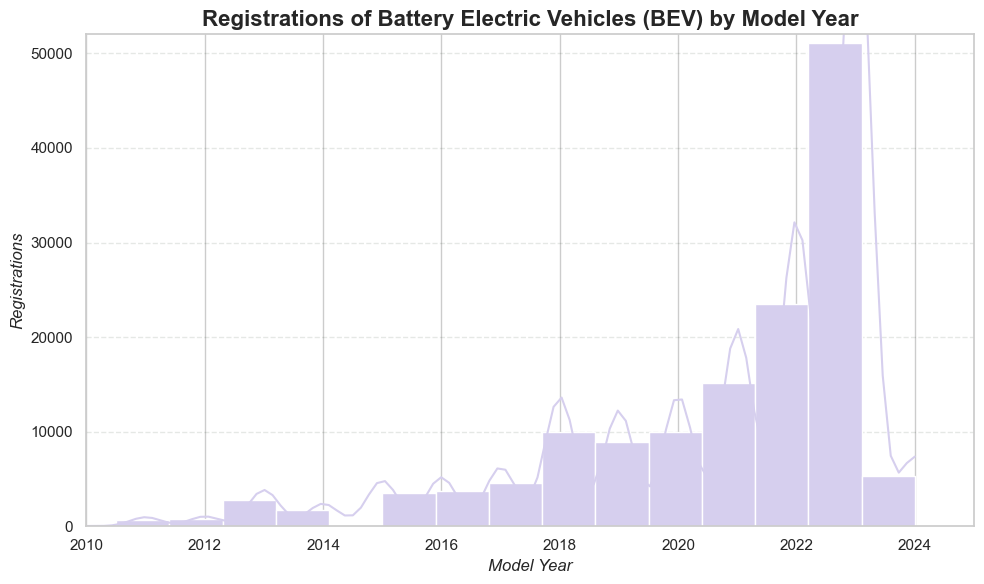

In [8]:
# Create the plot
x=bev_df['Model Year']
plt.figure(figsize=(10,6))
sns.histplot(x, color='#D6CFEE', alpha=1, bins=30, kde=True)

# Customizations
plt.title("Registrations of Battery Electric Vehicles (BEV) by Model Year", fontsize=16, fontweight="bold")
plt.xlabel("Model Year", fontsize=12, fontstyle="italic")
plt.ylabel("Registrations", fontsize=12, fontstyle="italic")
plt.ylim(0, 52000)
plt.xlim(2010, 2025)

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)


# Save/Show plot
plt.tight_layout()
plt.savefig("images/Histogram-Registrations_of_Battery_Electric_Vehicles_(BEV)_by_Model_Year.png")
plt.show()

## Histogram - Registrations of Plug-in Hybrid Electric Vehicle (PHEV) by Model Year

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


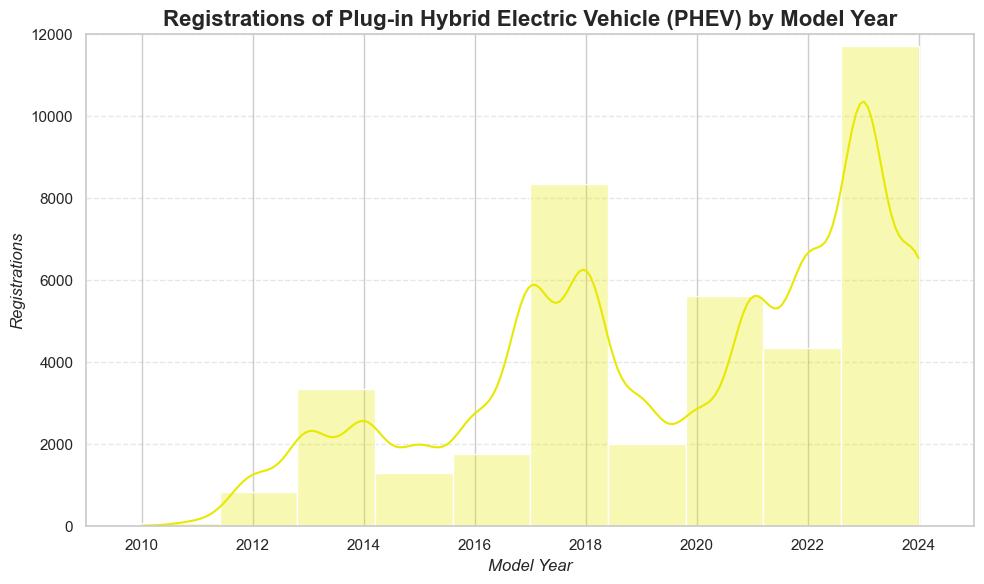

In [9]:
# Create the plot
x=hybrid_df['Model Year']
plt.figure(figsize=(10,6))
sns.histplot(x, bins=10, color="#E7E900", alpha=0.3, kde=True)

# Customizations
plt.title("Registrations of Plug-in Hybrid Electric Vehicle (PHEV) by Model Year", fontsize=16, fontweight="bold")
plt.xlabel("Model Year", fontsize=12, fontstyle="italic")
plt.ylabel("Registrations", fontsize=12, fontstyle="italic")
plt.ylim(0, 12000)
plt.xlim(2009, 2025)

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)


# Save/Show plot
plt.tight_layout()
plt.savefig("images/Histogram-Registrations_of_Plug-in_Hybrid_Electric_Vehicle_(PHEV)_by_Model_Year.png")
plt.show()

## Histogram - Registrations of BEVs vs Hybrids by Model Year

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


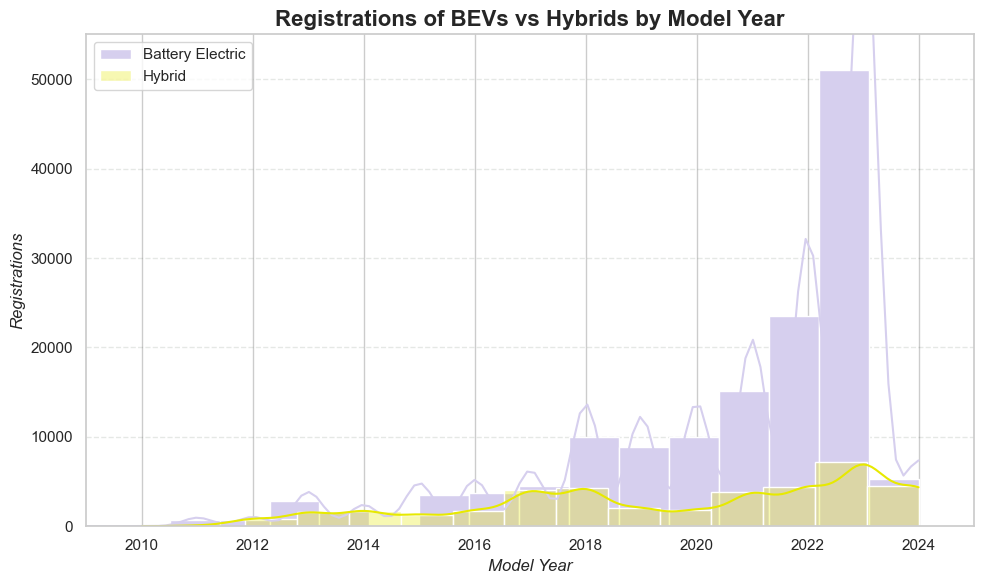

In [10]:
# Create the plot
plt.figure(figsize=(10,6))
sns.histplot(x=bev_df['Model Year'], color='#D6CFEE', alpha=1, label='Battery Electric', bins=30, kde=True)
sns.histplot(x=hybrid_df['Model Year'], color='#E7E900', alpha=0.30, label='Hybrid', bins=15, kde=True)

# Customizations
plt.title("Registrations of BEVs vs Hybrids by Model Year", fontsize=16, fontweight="bold")
plt.xlabel("Model Year", fontsize=12, fontstyle="italic")
plt.ylabel("Registrations", fontsize=12, fontstyle="italic")
plt.ylim(0, 55000)
plt.xlim(2009, 2025)
plt.legend()

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)

# Save/Show plot
plt.tight_layout()
plt.savefig("images/Histogram-Registrations_of_BEVs_vs_Hybrids_by_Model_Year.png")
plt.show()

## Violin Plot - Registrations of Plug-in Hybrid Electric Vehicle (PHEV) by Model Year

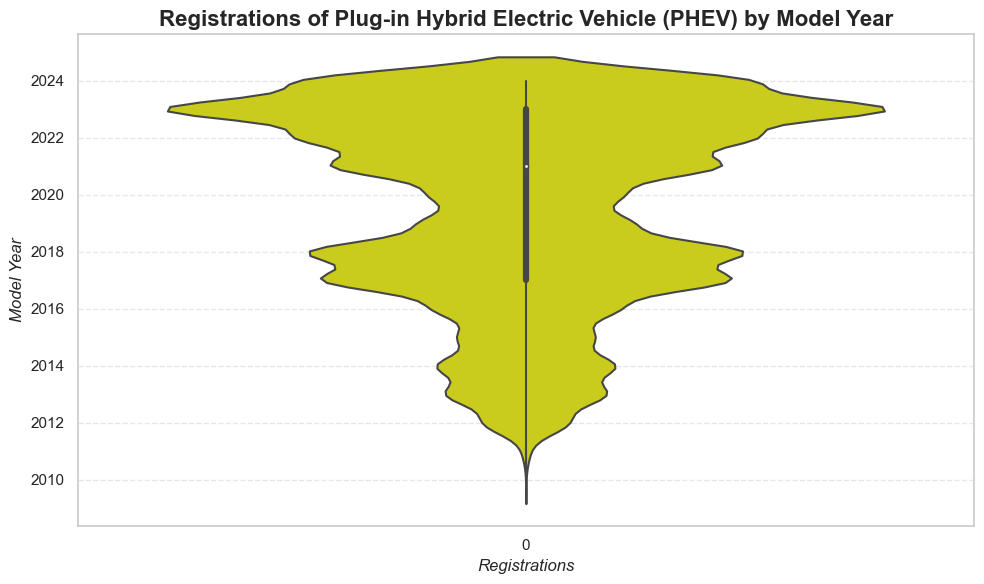

In [11]:
# Create the plot
y=hybrid_df['Model Year']
plt.figure(figsize=(10,6))
sns.violinplot(y, bins=10, color="#E7E900", alpha=0.3)

# Customizations
plt.title("Registrations of Plug-in Hybrid Electric Vehicle (PHEV) by Model Year", fontsize=16, fontweight="bold")
plt.xlabel("Registrations", fontsize=12, fontstyle="italic")
plt.ylabel("Model Year", fontsize=12, fontstyle="italic")

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)

# Save/Show plot
plt.tight_layout()
plt.savefig("images/Violin_Plot-Registrations_of_Plug-in_Hybrid_Electric_Vehicle_(PHEV)_by_Model_Year.png")
plt.show()

## Violin Plot - Registrations of Battery Electric Vehicles (BEV) by Model Year

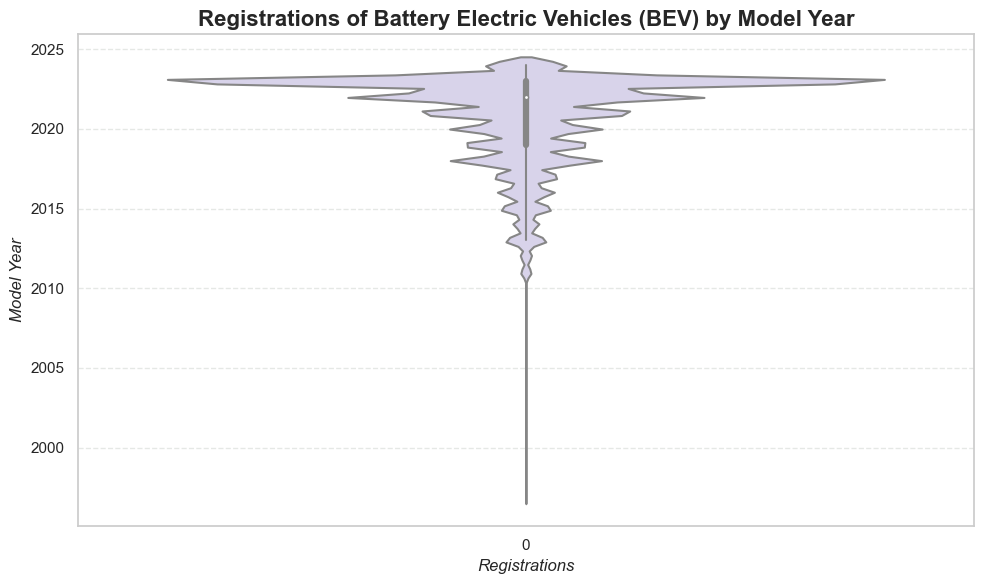

In [12]:
# Create the plot
y=bev_df['Model Year']
plt.figure(figsize=(10,6))
sns.violinplot(y, color='#D6CFEE', alpha=1)

# Customizations
plt.title("Registrations of Battery Electric Vehicles (BEV) by Model Year", fontsize=16, fontweight="bold")
plt.xlabel("Registrations", fontsize=12, fontstyle="italic")
plt.ylabel("Model Year", fontsize=12, fontstyle="italic")

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)

# Save/Show plot
plt.tight_layout()
plt.savefig("images/Violin_Plot-Registrations_of_Battery_Electric_Vehicles_(BEV)_by_Model_Year.png")
plt.show()